In [1]:
import os
import sys

import numpy as np
import matplotlib.pyplot as plt
from hydra import initialize, compose
from glob import glob
from pprint import pprint

# set paths to various directories based on the machine this code is being executed on
try:
    with initialize(version_base=None, config_path='config'):  
        config = compose(config_name='config.yaml')  # overrides=['machine=uzay']
except:
    with initialize(version_base=None, config_path='../../config'):  
        config = compose(config_name='config.yaml')  # overrides=['machine=uzay']

array_dir, data_dir, figure_dir, pickle_dir, repo_dir  = config.machine.array_dir, config.machine.data_dir, config.machine.figure_dir, config.machine.pickle_dir, config.machine.repo_dir

# enable use of local modules
if repo_dir not in sys.path:
    sys.path.append(repo_dir)

# set matplotlib style
plt.style.use(f'{repo_dir}/mejiro/mplstyle/science.mplstyle')

from mejiro.plots import plot
from mejiro.lenses import lens_util
from mejiro.utils import util

In [2]:
pipeline_params = util.hydra_to_dict(config.pipeline)
debugging = pipeline_params['debugging']
if debugging:
    pipeline_dir = f'{config.machine.pipeline_dir}_dev'
else:
    pipeline_dir = config.machine.pipeline_dir
print(f'{pipeline_dir=}')

all_lenses = lens_util.get_detectable_lenses(pipeline_dir, with_subhalos=True, suppress_output=False)

pipeline_dir='/data/bwedig/mejiro/pipeline_dev'


  0%|          | 0/452 [00:00<?, ?it/s]

100%|██████████| 452/452 [00:04<00:00, 99.39it/s] 


Count: 30
('snrs=[61.111027814095216, 77.55651972691437, 50.53208740533809, '
 '61.978410925258466, 59.31698178723652, 78.85325465985855, 53.06428507129011, '
 '50.800541193219644, 56.82844203314669, 62.88172381529685, 54.13183907520274, '
 '50.91896141975109, 64.55192506979917, 55.737937412584586, 55.48136645282584, '
 '58.99687480026246, 56.636996018951514, 52.007023228133455, '
 '63.82741637903584, 111.55933829347376, 60.33415885474793, '
 '63.725365817266926, 60.66961019955097, 111.4888092034621, 55.49010134961435, '
 '59.00375116049763, 66.11609811122385, 69.64651918409587, 56.360533887602514, '
 '70.19563884202208]')
['/data/bwedig/mejiro/pipeline_dev/04/sca01/galsim_00000001_F062.npy', '/data/bwedig/mejiro/pipeline_dev/04/sca01/galsim_00000001_F087.npy', '/data/bwedig/mejiro/pipeline_dev/04/sca01/galsim_00000001_F106.npy']
['/data/bwedig/mejiro/pipeline_dev/04/sca02/galsim_00000049_F062.npy', '/data/bwedig/mejiro/pipeline_dev/04/sca02/galsim_00000049_F087.npy', '/data/bwedig/mej

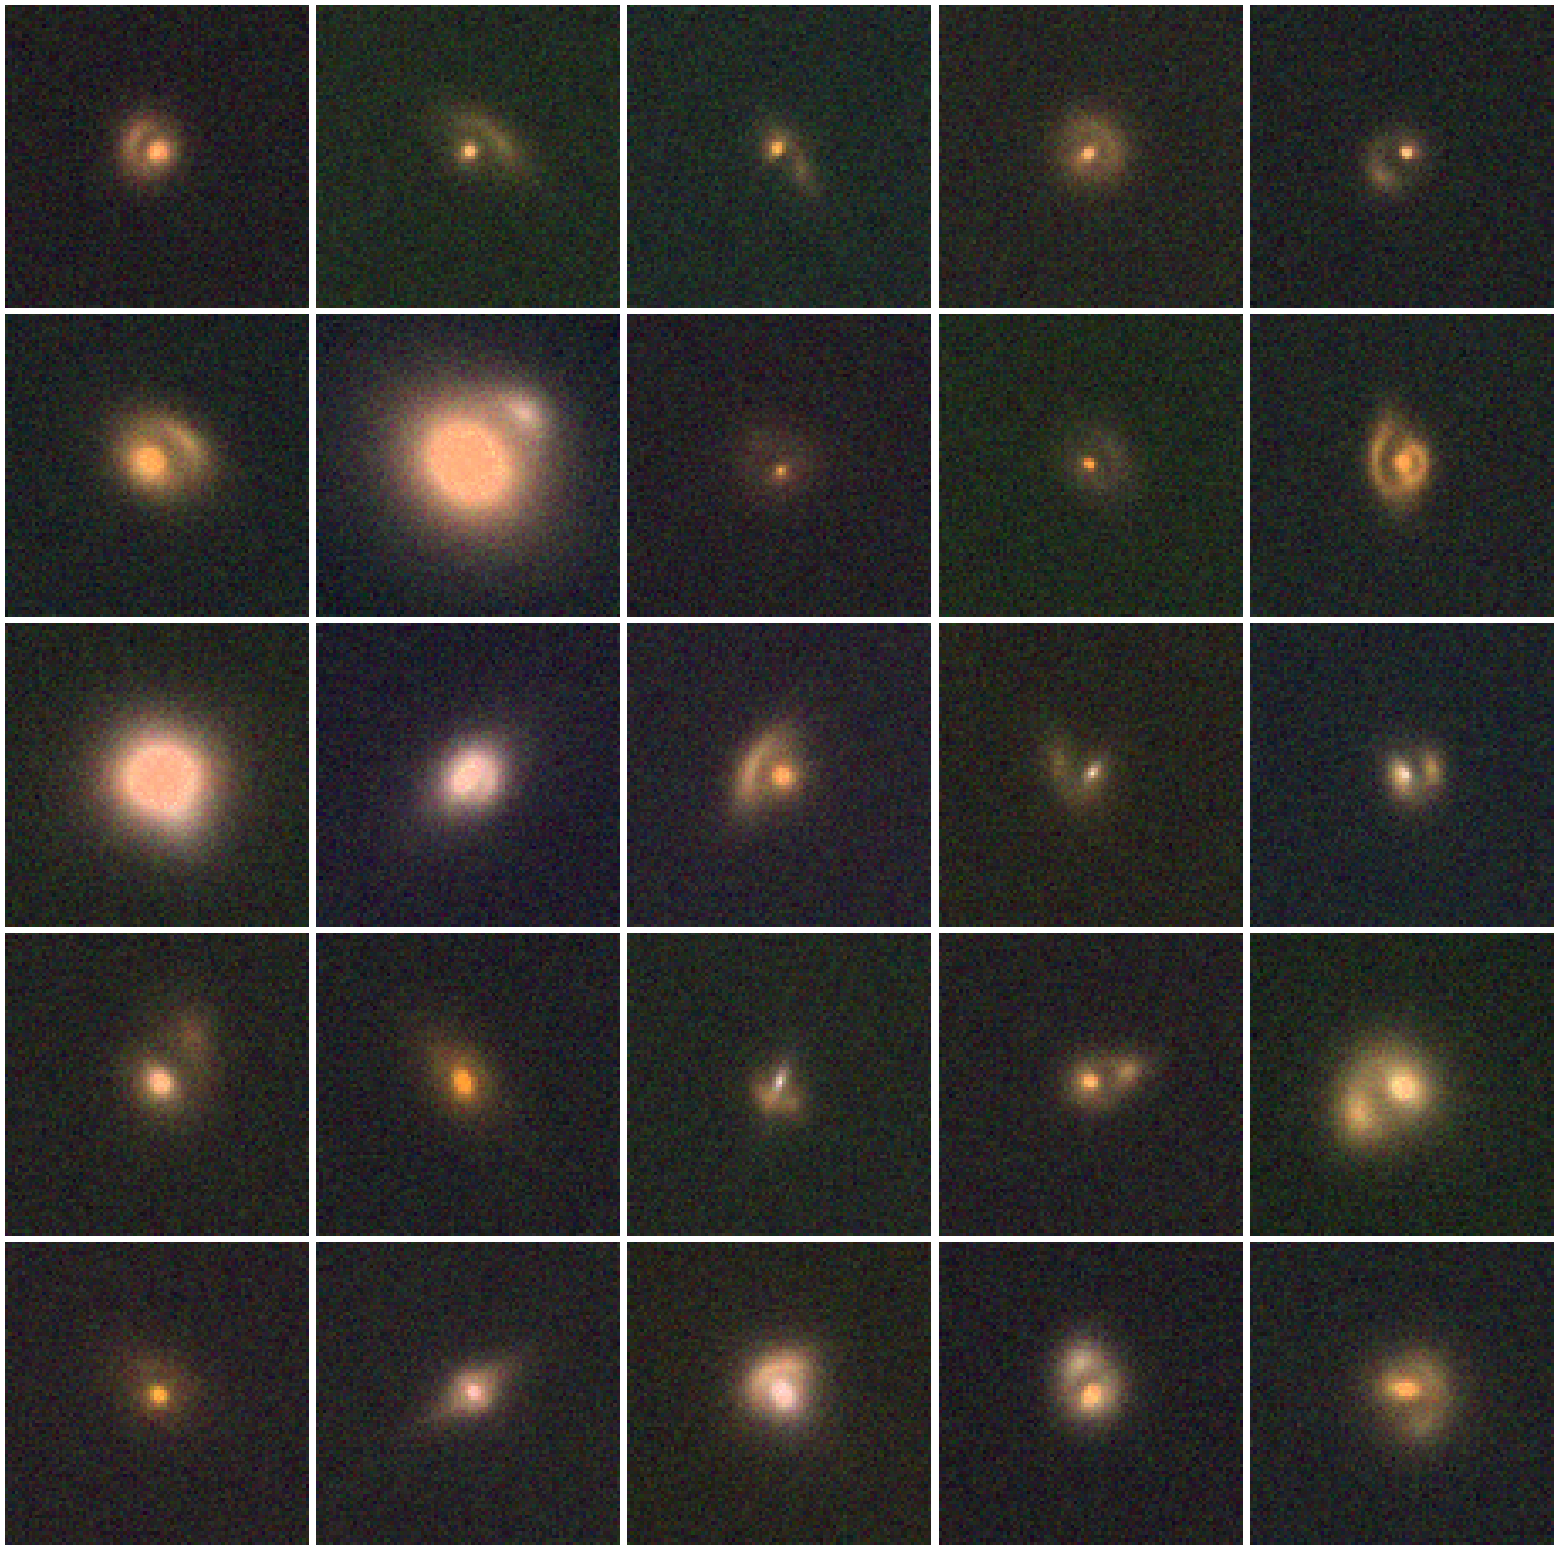

In [8]:
high_snr = [l for l in all_lenses if l.snr > 50 and l.get_einstein_radius() > 0.5]
print(f'Count: {len(high_snr)}')

uids = [l.uid for l in high_snr]
snrs = [l.snr for l in high_snr]
pprint(f'{snrs=}')

color = [lens_util.get_sample(pipeline_dir, index=uid, rgb_bands=pipeline_params['rgb_bands'], model=False)[2] for uid in uids]

plot.rgb_plot_grid(color, side=np.floor(np.sqrt(len(high_snr))).astype(int))